
###Text Analysis using spaCy
A loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).



In [ ]:
import glob
import os

txt_files = glob.glob('./HW1_Dataset/*.txt')

for file_path in txt_files:
    with open(file_path, 'r', encoding='utf-8') as file:
        contents = file.read()

    print(f"{file_path} {len(contents)}")

./HW1_Dataset/My Secret Life, Volumes I. to III. by Anonymous (157).txt 1378627
./HW1_Dataset/My Fifteen Lost Years by Florence Elizabeth Maybrick (499).txt 383694
./HW1_Dataset/Narrative of the Captivity and Restoration of Mrs. Mary Rowlandson by Mary White Rowlandson (222).txt 123784
./HW1_Dataset/Through the Looking-Glass by Lewis Carroll (134).txt 181667
./HW1_Dataset/The Divine Comedy by Dante, Illustrated by Dante Alighieri (119).txt 2161
./HW1_Dataset/Alice in Wonderland by Lewis Carroll and Alice Gerstenberg (126).txt 104079
./HW1_Dataset/Jane Eyre_ An Autobiography by Charlotte Brontë (290) (Unicode Encoding Conflict).txt 1049267
./HW1_Dataset/The Hound of the Baskervilles by Arthur Conan Doyle (223).txt 339188
./HW1_Dataset/The Tragedy of Romeo and Juliet by William Shakespeare (131).txt 174128
./HW1_Dataset/Liberalism by L. T.  Hobhouse (119).txt 305345
./HW1_Dataset/Essays by Ralph Waldo Emerson by Ralph Waldo Emerson (239).txt 557197
./HW1_Dataset/The Legend of Sleepy Hol

Print out the top 15 longest books (in terms of raw string length, which is what you had already computed).

In [ ]:
from collections import OrderedDict

txt_files = glob.glob('./HW1_Dataset/*.txt')

files_lengths = OrderedDict()

for file_path in txt_files:
    with open(file_path, 'r', encoding='utf-8') as file:
        contents = file.read()
        files_lengths[file_path] = len(contents)

sorted_files = sorted(files_lengths.items(), key=lambda x: x[1], reverse=True)

print("Top 15 Longest Books:")
for i, (file_path, length) in enumerate(sorted_files[:15], start=1):
    print(f"{i}. {length} {file_path}")

Top 15 Longest Books:
1. 5465100 ./HW1_Dataset/The Complete Works of William Shakespeare by William Shakespeare (132).txt
2. 4351846 ./HW1_Dataset/The King James Version of the Bible (132).txt
3. 3254333 ./HW1_Dataset/Les Misérables by Victor Hugo (165) (Unicode Encoding Conflict).txt
4. 3227580 ./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt
5. 3033575 ./HW1_Dataset/Essays of Michel de Montaigne — Complete by Michel de Montaigne (205).txt
6. 2643849 ./HW1_Dataset/The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt
7. 1534140 ./HW1_Dataset/Ulysses by James Joyce (282).txt
8. 1378627 ./HW1_Dataset/My Secret Life, Volumes I. to III. by Anonymous (157).txt
9. 1238569 ./HW1_Dataset/Moby Dick; Or, The Whale by Herman Melville (413).txt
10. 1231784 ./HW1_Dataset/Leviathan by Thomas Hobbes (417).txt
11. 1214387 ./HW1_Dataset/The Republic by Plato (246).txt
12. 1200021 ./HW1_Dataset/The History of the Peloponnesian War by Thucydides (122).txt
13. 1175588 ./HW1_Datase

As a toy example, suppose that a book's text is `'cat dog shark spam eggs'` and we want to split it up into batches where each batch has at most 3 words. Then we could split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.

Code for that:

In [ ]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


A loop that goes through all 100 books again. However, for each book, split it up into batches so that each batch has at most 10000 words.

In [ ]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch=10000):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []

    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)

    return batches

txt_files = glob.glob('./HW1_Dataset/*.txt')

total_batches = 0

for file_path in txt_files:
    with open(file_path, 'r', encoding='utf-8') as file:
        contents = file.read()
        batches = split_into_batches(contents)
        total_batches += len(batches)

print(f"Total number of batches: {total_batches}")

Total number of batches: 1246


  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

In [ ]:
import spacy
import re
from collections import Counter

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

txt_files = glob.glob('./HW1_Dataset/*.txt')

term_freq_table = Counter()

def split_into_batches(book_text, max_num_words_per_batch=10000):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []

    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)

    return batches

for file_path in txt_files:
    with open(file_path, 'r', encoding='utf-8') as file:
        contents = file.read()
        batches = split_into_batches(contents)

        for batch in batches:
            doc = nlp(batch)
            lemmas = [token.lemma_ for token in doc if re.match(r'[a-zA-Z]+$', token.lemma_)]
            term_freq_table.update(lemmas)

sorted_term_freq = sorted(term_freq_table.items(), key=lambda x: x[1], reverse=True)

print("Top 50 Most Frequent Words:")
for rank, (term, freq) in enumerate(sorted_term_freq[:50], start=1):
    print(f"{rank}. {term} ({freq})")

Top 50 Most Frequent Words:
1. the (702465)
2. be (436114)
3. and (435424)
4. of (386347)
5. to (324409)
6. I (255129)
7. a (233423)
8. in (204252)
9. he (193622)
10. that (159010)
11. have (158746)
12. it (135431)
13. not (111854)
14. his (108536)
15. you (102595)
16. with (101227)
17. they (96821)
18. for (95320)
19. as (90702)
20. she (78524)
21. but (75599)
22. my (73983)
23. do (68758)
24. at (64947)
25. on (62833)
26. by (61274)
27. this (61240)
28. we (60300)
29. which (58868)
30. all (58636)
31. say (58348)
32. from (50095)
33. so (47999)
34. or (47810)
35. her (42838)
36. one (41123)
37. will (40920)
38. man (39585)
39. their (38418)
40. what (37851)
41. no (37808)
42. there (37209)
43. if (34898)
44. go (33899)
45. when (33587)
46. an (32517)
47. come (32358)
48. see (32024)
49. would (31289)
50. who (30934)


 Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

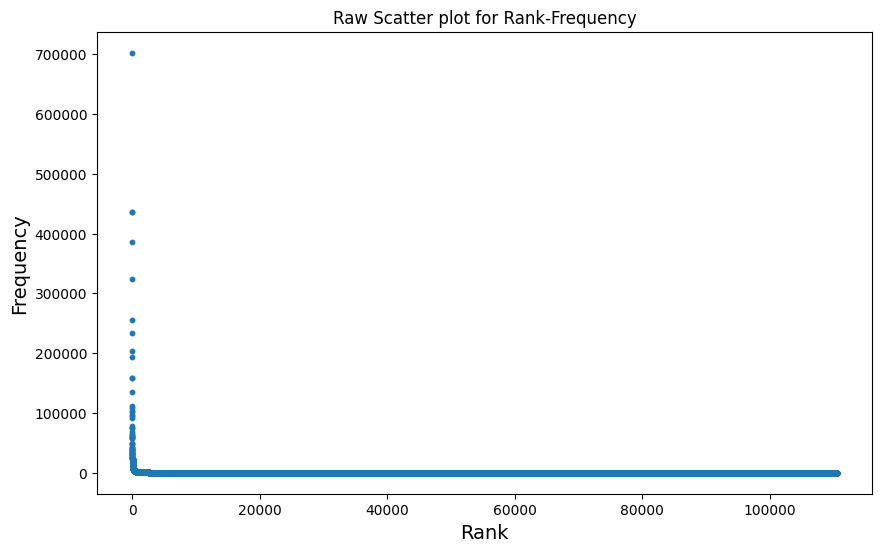

In [ ]:
import matplotlib.pyplot as plt

sorted_term_freq = sorted(term_freq_table.items(), key=lambda x: x[1], reverse=True)

ranks = range(1, len(sorted_term_freq) + 1)
frequencies = [freq for term, freq in sorted_term_freq]

plt.figure(figsize=(10, 6))
plt.scatter(ranks, frequencies, s=10)
plt.title('Raw Scatter plot for Rank-Frequency')
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

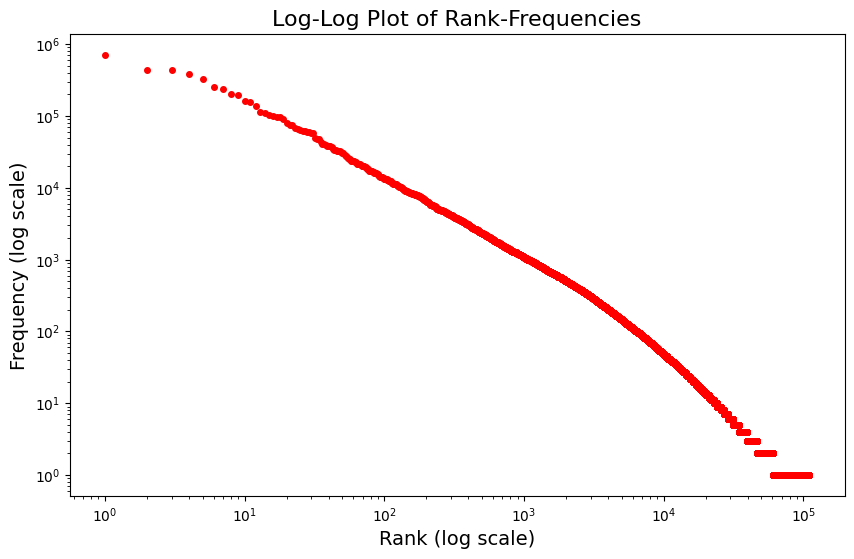

In [ ]:
# Log-log plot
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, 'ro', markersize=4)
plt.title('Log-Log Plot of Rank-Frequencies', fontsize=16)
plt.xlabel('Rank (log scale)', fontsize=14)
plt.ylabel('Frequency (log scale)', fontsize=14)
plt.show()


From the log-log plot, we can observe that the relationship between the frequency and rank of terms roughly follows a straight line with a negative slope, which is consistent with the power law distribution.
<p>
The linearity in the log-log plot suggests that the term frequency decays according to a power law as the rank increases.

 What is the probability of drawing one of the 4 most frequent alphabetic lemmas? What is the probability of drawing one of the 50 most frequent alphabetic lemmas?

In [ ]:
print('Probability of drawing one of the 4 most frequent alphabetic lemmas: ')

top_4_freq = sum(freq for _, freq in sorted_term_freq[:4])
top_50_freq = sum(freq for _, freq in sorted_term_freq[:50])
total_freq = sum(term_freq_table.values())

prob_top_4 = top_4_freq / total_freq
print(prob_top_4)

print('Probability of drawing one of the 50 most frequent alphabetic lemmas: ')
prob_top_50 = top_50_freq / total_freq
print(prob_top_50)

Probability of drawing one of the 4 most frequent alphabetic lemmas: 
0.1622357591331735
Probability of drawing one of the 50 most frequent alphabetic lemmas: 
0.48313616242395213


What proportion of the alphabetic lemmas occur only once? What proportion of the alphabetic lemmas occur fewer than 10 times?

In [ ]:
print("Occur only once: ")
unique_lemmas = sum(freq == 1 for lemma, freq in term_freq_table.items() if re.match(r'[a-zA-Z]+$', lemma))

total_alphabetic_lemmas = sum(1 for lemma in term_freq_table if re.match(r'[a-zA-Z]+$', lemma))

prop_unique = unique_lemmas / total_alphabetic_lemmas
print(prop_unique)

print("Occur fewer than 10 times: ")

infrequent_lemmas = sum(freq < 10 for lemma, freq in term_freq_table.items() if re.match(r'[a-zA-Z]+$', lemma))

prop_infrequent = infrequent_lemmas / total_alphabetic_lemmas
print(prop_infrequent)

Occur only once: 
0.44752296068407005
Occur fewer than 10 times: 
0.7815500158349545


Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [ ]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to /root/nltk_data...


True

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


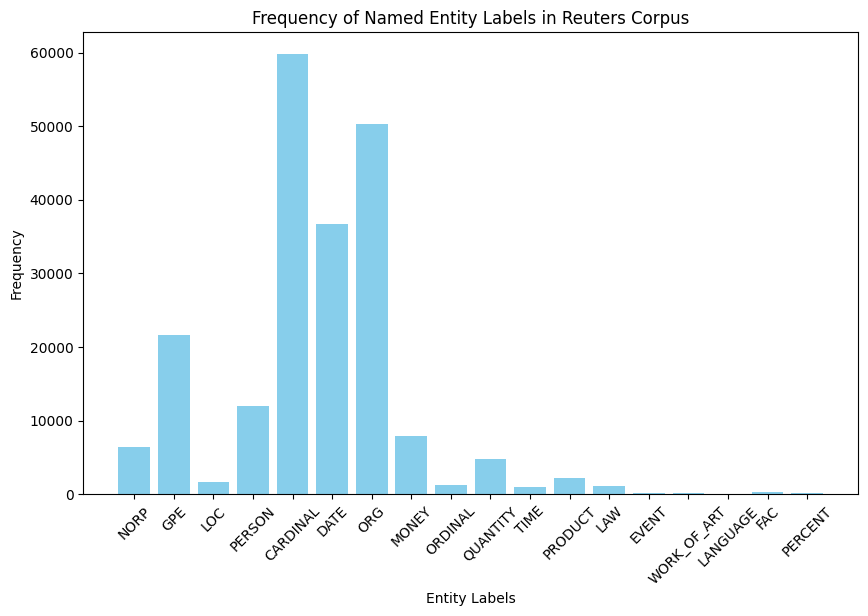

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

for doc in reuters_nlp:
    label_counter.update([ent.label_ for ent in doc.ents])

labels, frequencies = zip(*label_counter.items())

plt.figure(figsize=(10, 6))
plt.bar(labels, frequencies, color='skyblue')
plt.xlabel('Entity Labels')
plt.ylabel('Frequency')
plt.title('Frequency of Named Entity Labels in Reuters Corpus')
plt.xticks(rotation=45)
plt.show()

List the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively.


In [ ]:
from collections import Counter
org_counter = Counter()
gpe_counter = Counter()

for doc in reuters_nlp:
    org_entities = set()
    gpe_entities = set()
    for ent in doc.ents:
        if ent.label_ == 'ORG':
            org_entities.add(ent.text.lower())
        elif ent.label_ == 'GPE':
            gpe_entities.add(ent.text.lower())
    for org_entity in org_entities:
        org_counter[org_entity] += 1
    for gpe_entity in gpe_entities:
        gpe_counter[gpe_entity] += 1

# List the top 10 most frequently occurring entities with label 'ORG'
print("Top 10 'ORG' entities:")
for entity, count in org_counter.most_common(10):
    print(f"{entity.capitalize()} ({count})")

# List the top 10 most frequently occurring entities with label 'GPE'
print("\nTop 10 'GPE' entities:")
for entity, count in gpe_counter.most_common(10):
    print(f"{entity.capitalize()} ({count})")

Top 10 'ORG' entities:
Cts (1115)
Reuters (444)
The securities and exchange commission (248)
Ec (231)
Fed (230)
Treasury (228)
Cts net (179)
The u.s. agriculture department (170)
Usda (154)
The bank of england (143)

Top 10 'GPE' entities:
U.s. (1631)
Japan (579)
The united states (383)
U.k. (297)
Canada (295)
New york (251)
West germany (236)
Washington (230)
London (216)
Brazil (201)


Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value)


In [ ]:
import math
opec_docs = set()
gpe_docs = Counter()
total_docs = len(reuters_fileids)
for doc in reuters_nlp:
    has_opec = False
    gpe_entities = set()
    for ent in doc.ents:
        if ent.label_ == 'ORG' and ent.text.lower() == 'opec':
            has_opec = True
            opec_docs.add(doc)
        elif ent.label_ == 'GPE':
            gpe_entities.add(ent.text.lower())
    for gpe_entity in gpe_entities:
        gpe_docs[gpe_entity] += 1

opec_count = len(opec_docs)
pmi_values = []

for gpe_entity, gpe_count in gpe_docs.items():
    co_occur_count = sum(1 for doc in opec_docs if gpe_entity in [ent.text.lower() for ent in doc.ents if ent.label_ == 'GPE'])
    if co_occur_count == 0 or opec_count == 0 or gpe_count == 0:
        pmi = 0
    else:
        pmi = math.log((co_occur_count * total_docs) / (opec_count * gpe_count))
    pmi_values.append((gpe_entity, pmi))

pmi_values.sort(key=lambda x: x[1], reverse=True)

print("Top 50 'GPE' entities with highest PMI values with regard to 'opec':")
for gpe_entity, pmi in pmi_values[:50]:
    print(f"{gpe_entity.capitalize()} ({pmi:.2f})")

Top 50 'GPE' entities with highest PMI values with regard to 'opec':
Brent (4.48)
Ula fields (4.48)
Emirates (4.48)
The lake charles (4.48)
Franco (4.48)
Bethesda (4.48)
Gabon (4.48)
Opec (4.48)
Saudi arabia reiterates commitment to (4.48)
Yanbu (4.48)
El salado (4.48)
Aguarico (4.48)
Jubail (4.48)
Ju'aymah (4.48)
Ras tanurah (4.48)
Tripoli (4.48)
Doha (4.48)
Guayaquil (4.48)
Tihamah (4.48)
Redoglia (4.48)
Carrington (4.48)
Materialy (4.48)
Vienna (4.32)
Riyadh (4.26)
Saudi arabia's (4.11)
Balao (4.08)
Quito (4.08)
Qatar (3.93)
Dubai (3.92)
Caracas (3.89)
Nigeria (3.79)
Nordic (3.79)
Kahan (3.79)
Statfjord (3.79)
Oseberg (3.79)
Dunham (3.79)
La (3.79)
Libya (3.71)
Ecuador (3.66)
Saudi arabia (3.62)
Kuwait (3.56)
The united arab emirates (3.51)
Venezuela (3.47)
Lago agrio (3.38)
Petromin (3.38)
Alexandria (3.38)
Jakarta (3.38)
Lagos (3.38)
Jamaica (3.23)
Iceland (3.10)



### Unexpected Results:
1. **Brent:** Likely a reference to Brent Crude oil benchmark, not a geopolitical entity.
2. **The Lake Charles:** Probably an error in entity recognition.
3. **Franco:** Could be a person's name rather than a geopolitical entity.
4. **Bethesda:** A city in Maryland, USA, not typically associated with OPEC.
5. **Saudi Arabia reiterates commitment to:** A phrase containing a country name, not a GPE entity.
6. **Various smaller cities, regions, or oil fields:** Less strongly associated with OPEC.

### Reasons for Unexpected Results:
1. Errors in named entity recognition process.
2. Possible bias in the Reuters corpus towards certain regions/entities.
3. Some entities may be mentioned frequently in OPEC context due to specific events or agreements.

### Unsurprising Results:
1. **Emirates, Qatar, Dubai, Saudi Arabia, Kuwait, UAE:** OPEC member countries or closely associated.
2. **Vienna:** Headquarters of OPEC.
3. **Nigeria, Libya, Ecuador, Venezuela:** OPEC member countries and major oil producers.
4. **Caracas, Quito, Lagos, Riyadh:** Capital cities of OPEC member countries.

### Reasons for Unsurprising Results:
1. Strong association of these entities with OPEC due to membership, oil production, or significant locations.

Overall, our analysis suggests a mix of expected and unexpected results, likely influenced by the nuances of the named entity recognition process and the characteristics of the Reuters corpus.